In [ ]:
!pip install spacy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spacy

In [ ]:
spacy.cli.download("en_core_web_sm")

In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [6]:
fake_df = pd.read_csv("/content/drive/MyDrive/data/fake_news/Fake.csv")
true_df = pd.read_csv("/content/drive/MyDrive/data/fake_news/True.csv")

In [7]:
fake_df["is_fake"] = 1
true_df["is_fake"] = 0

In [8]:
news_df = pd.concat([fake_df, true_df], axis = 0).reset_index(drop = True)
news_df.head()

,title,text,subject,date,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [9]:
news_df.drop(columns = ['date'], inplace = True)

In [10]:
news_df['news'] = news_df['title'] + ' ' + news_df['text']

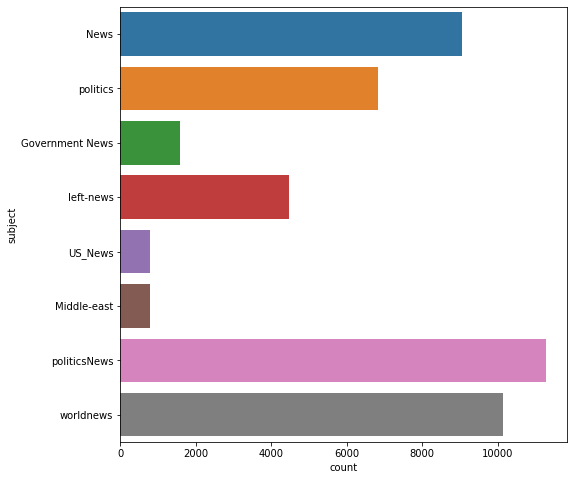

In [11]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.countplot(y='subject', data = news_df )

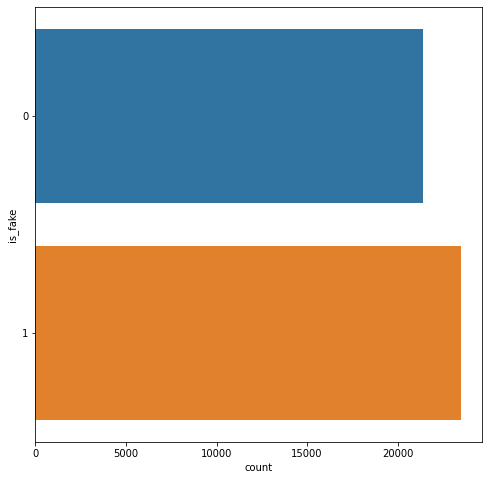

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(y='is_fake', data = news_df )

In [13]:
news_df.drop(columns = ['title', 'text'], inplace = True)

In [14]:
news_df.head()

,subject,is_fake,news
0,News,1,Donald Trump Sends Out Embarrassing New Year’...
1,News,1,Drunk Bragging Trump Staffer Started Russian ...
2,News,1,Sheriff David Clarke Becomes An Internet Joke...
3,News,1,Trump Is So Obsessed He Even Has Obama’s Name...
4,News,1,Pope Francis Just Called Out Donald Trump Dur...


In [15]:
news_df["is_fake"].value_counts()

1    23481
0    21417
Name: is_fake, dtype: int64

In [17]:
news_df["news_preprocessed"] = news_df["news"].apply(preprocess)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(news_df["news_preprocessed"], news_df["is_fake"], test_size = 0.2, random_state = 52, stratify = news_df["is_fake"])

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# **Random Forest Classifier**

In [20]:
clf_rf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),                       #using the ngram_range parameter 
    ('random_forest', (RandomForestClassifier()))  #RandomForestClassifier       
])
clf_rf.fit(X_train, Y_train)
y_pred_rf = clf_rf.predict(X_test)
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Text(69.0, 0.5, 'Truth')

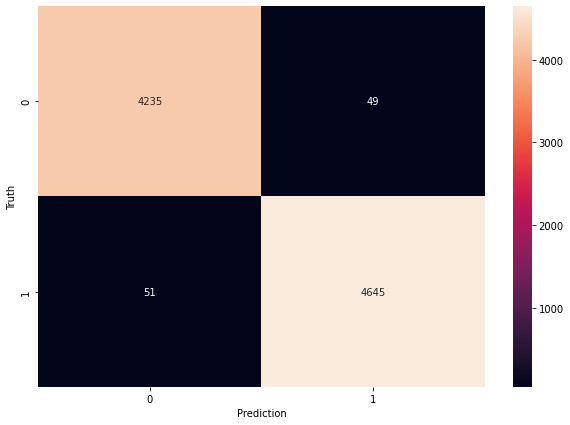

In [21]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(Y_test, y_pred_rf)
plt.figure(figsize = (10,7))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# **MultiNomial NB**

In [22]:
clf_nb = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),                       #using the ngram_range parameter 
    ('random_forest', (MultinomialNB())) #MultiNomialNB        
])
clf_nb.fit(X_train, Y_train)
y_pred_nb = clf_nb.predict(X_test)
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4284
           1       0.98      0.99      0.98      4696

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



Text(69.0, 0.5, 'Truth')

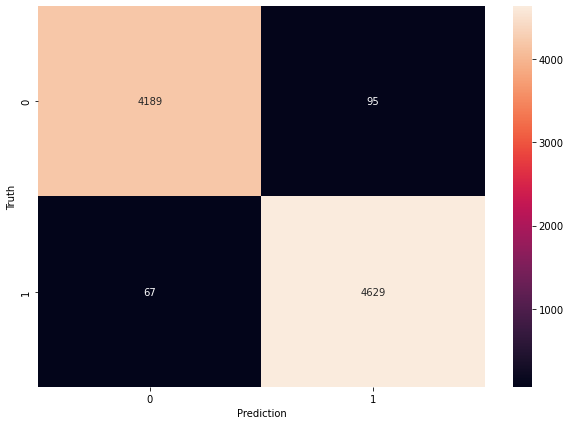

In [23]:
cm_nb = confusion_matrix(Y_test, y_pred_nb)
plt.figure(figsize = (10,7))
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# **Conclusion**

*    As the ngram_range keeps increasing, the number of dimensions/features (possible combination of words) also increases enormously and models have the risk of overfitting and resulting in terrible performance.
*   RandomForest with Unigram to Trigram features helps to produce very amazing results with very good F1 scores and Recall scores.

*  As Random Forest uses Bootstrapping(row and column Sampling) with many decision trees and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifying the categories.
*   The easy calculation of probabilities for the words in the corpus(Bag of words) and storing them in a contingency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.




